# Project Title: Predicting House Prices Using Linear Regression

## Data Exploration and Preprocessing

## Task 1: Data Exploration

### 1. Loading the Dataset

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

NumPy version: 2.1.3
Pandas version: 2.2.3
Matplotlib version: 3.10.1
Seaborn version: 0.13.2


In [8]:
df = pd.read_csv('../data/boston_housing.csv')

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 2. Data Structure and Summary Statistics

In [12]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Check the data types of each column
print("\nData Types:")
print(df.dtypes)

# Get summary statistics
print("\nSummary Statistics:")
df.describe()

Dataset Shape: (506, 14)

Data Types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Summary Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# Check for column names and information
print("Column Information:")
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


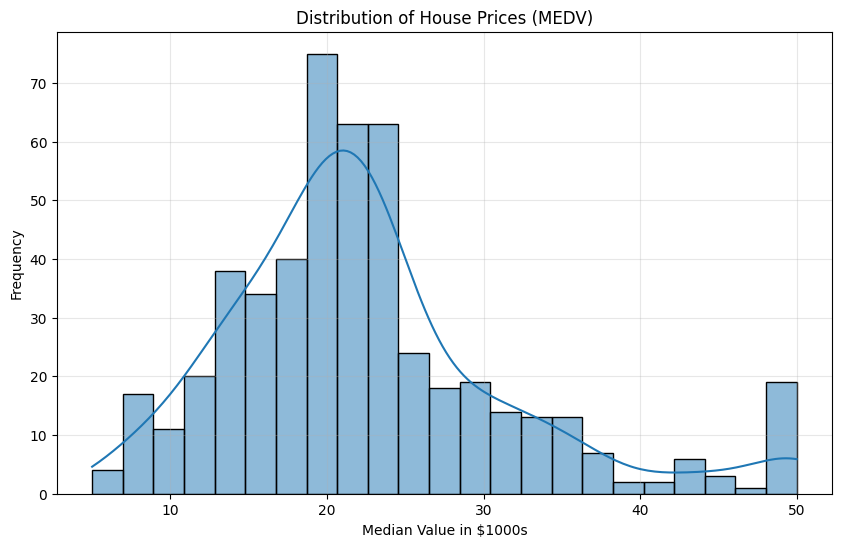

Skewness of target variable: 1.1080984082549072


In [14]:
# Check target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value in $1000s')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Skewness of target variable: {df['MEDV'].skew()}")


### 3. Feature Exploration and Visualization

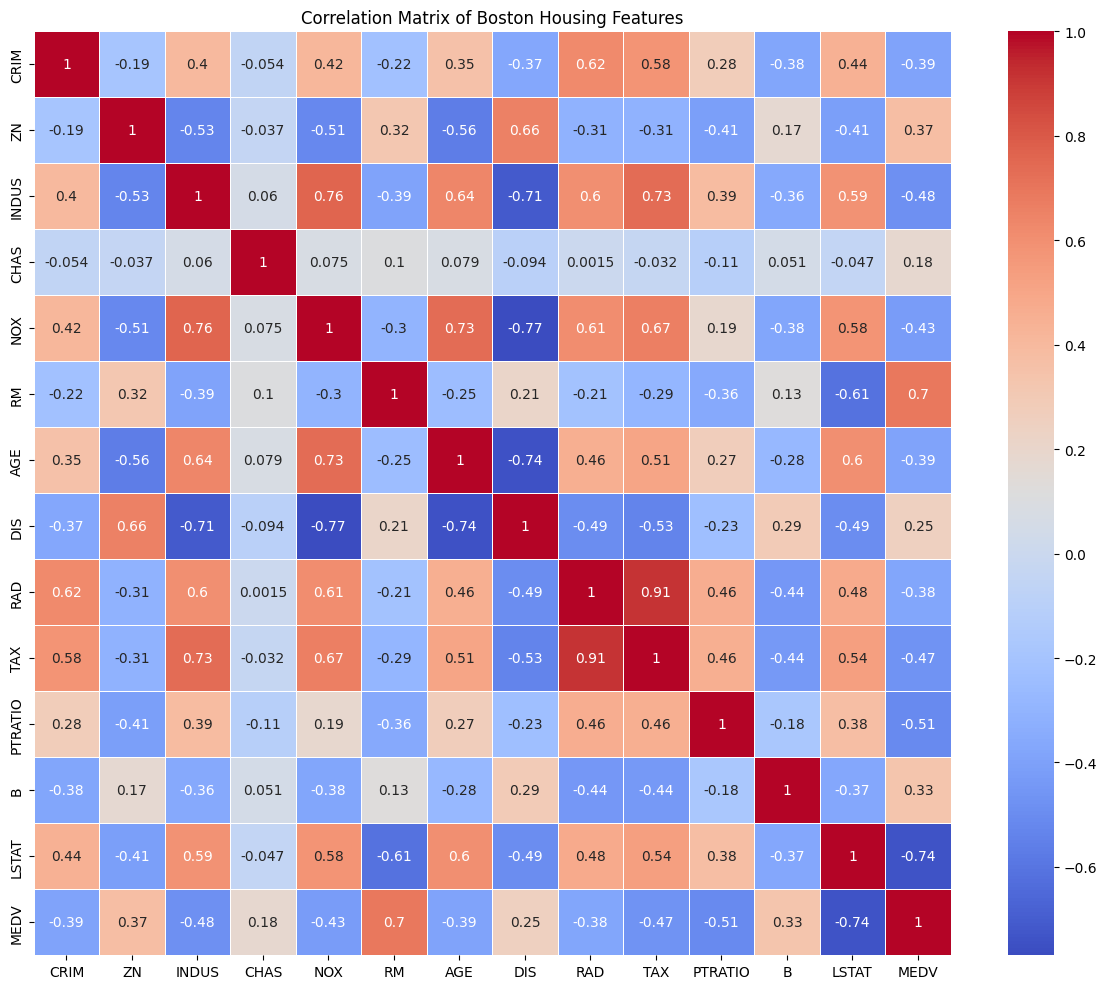

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Boston Housing Features')
plt.tight_layout()
plt.show()

In [16]:
# Identify the features with highest correlation to the target variable
correlation_with_target = correlation_matrix['MEDV'].drop('MEDV').sort_values(ascending=False)
print("Features correlated with house price (MEDV):")
print(correlation_with_target)

Features correlated with house price (MEDV):
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


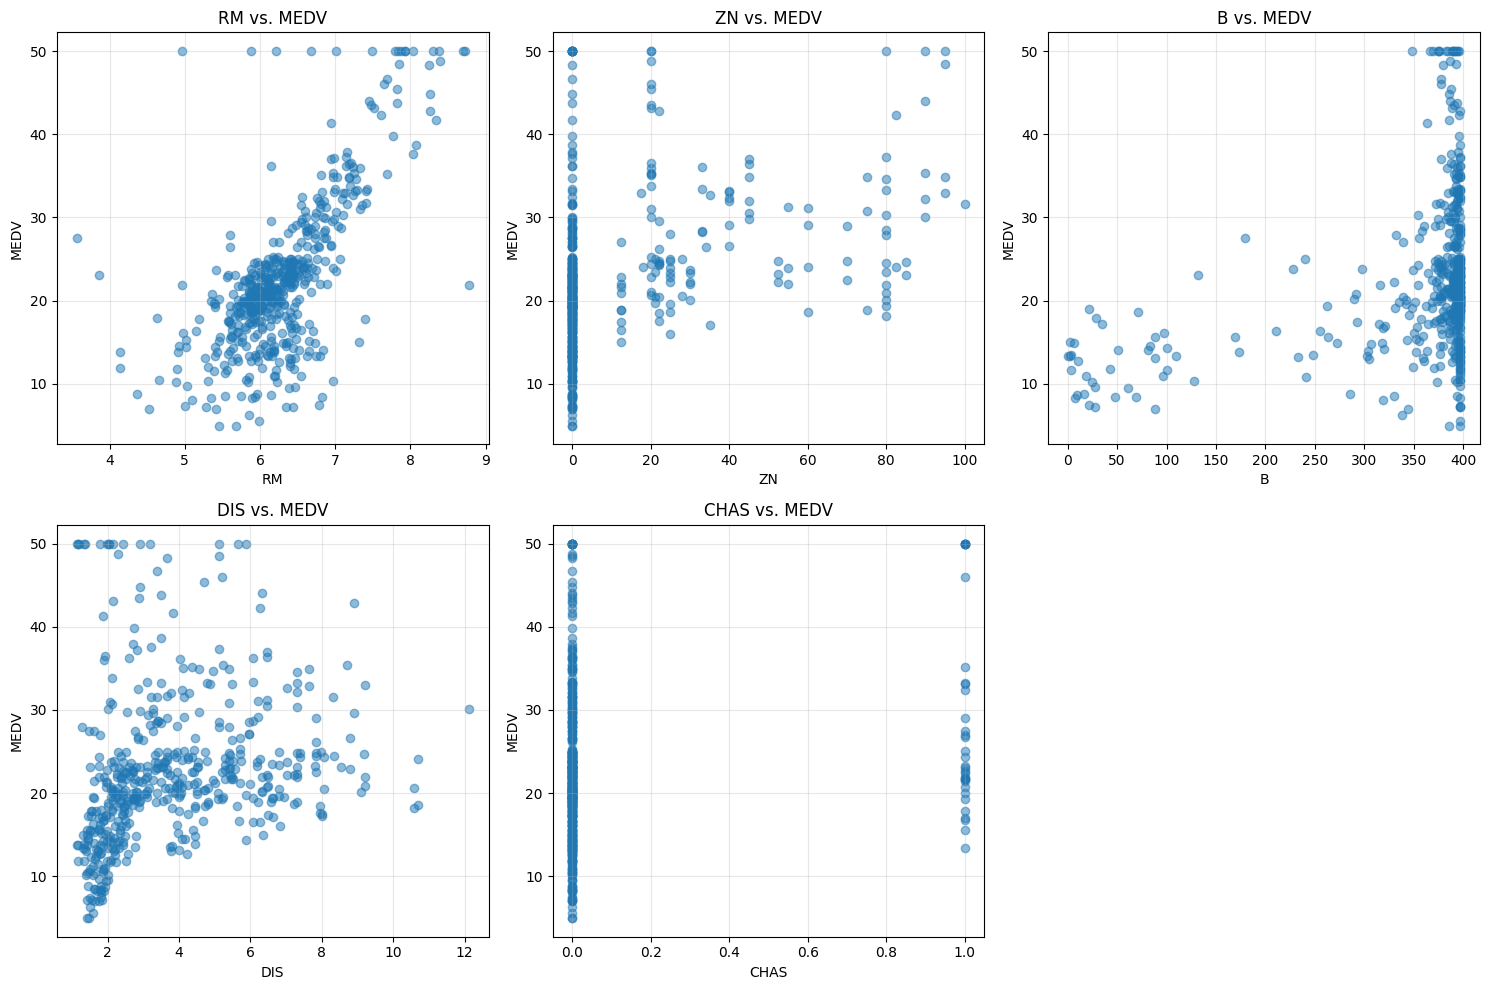

In [17]:
# Visualize top 5 correlated features
plt.figure(figsize=(15, 10))
top_corr_features = correlation_with_target.index[:5]

for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['MEDV'], alpha=0.5)
    plt.title(f'{feature} vs. MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

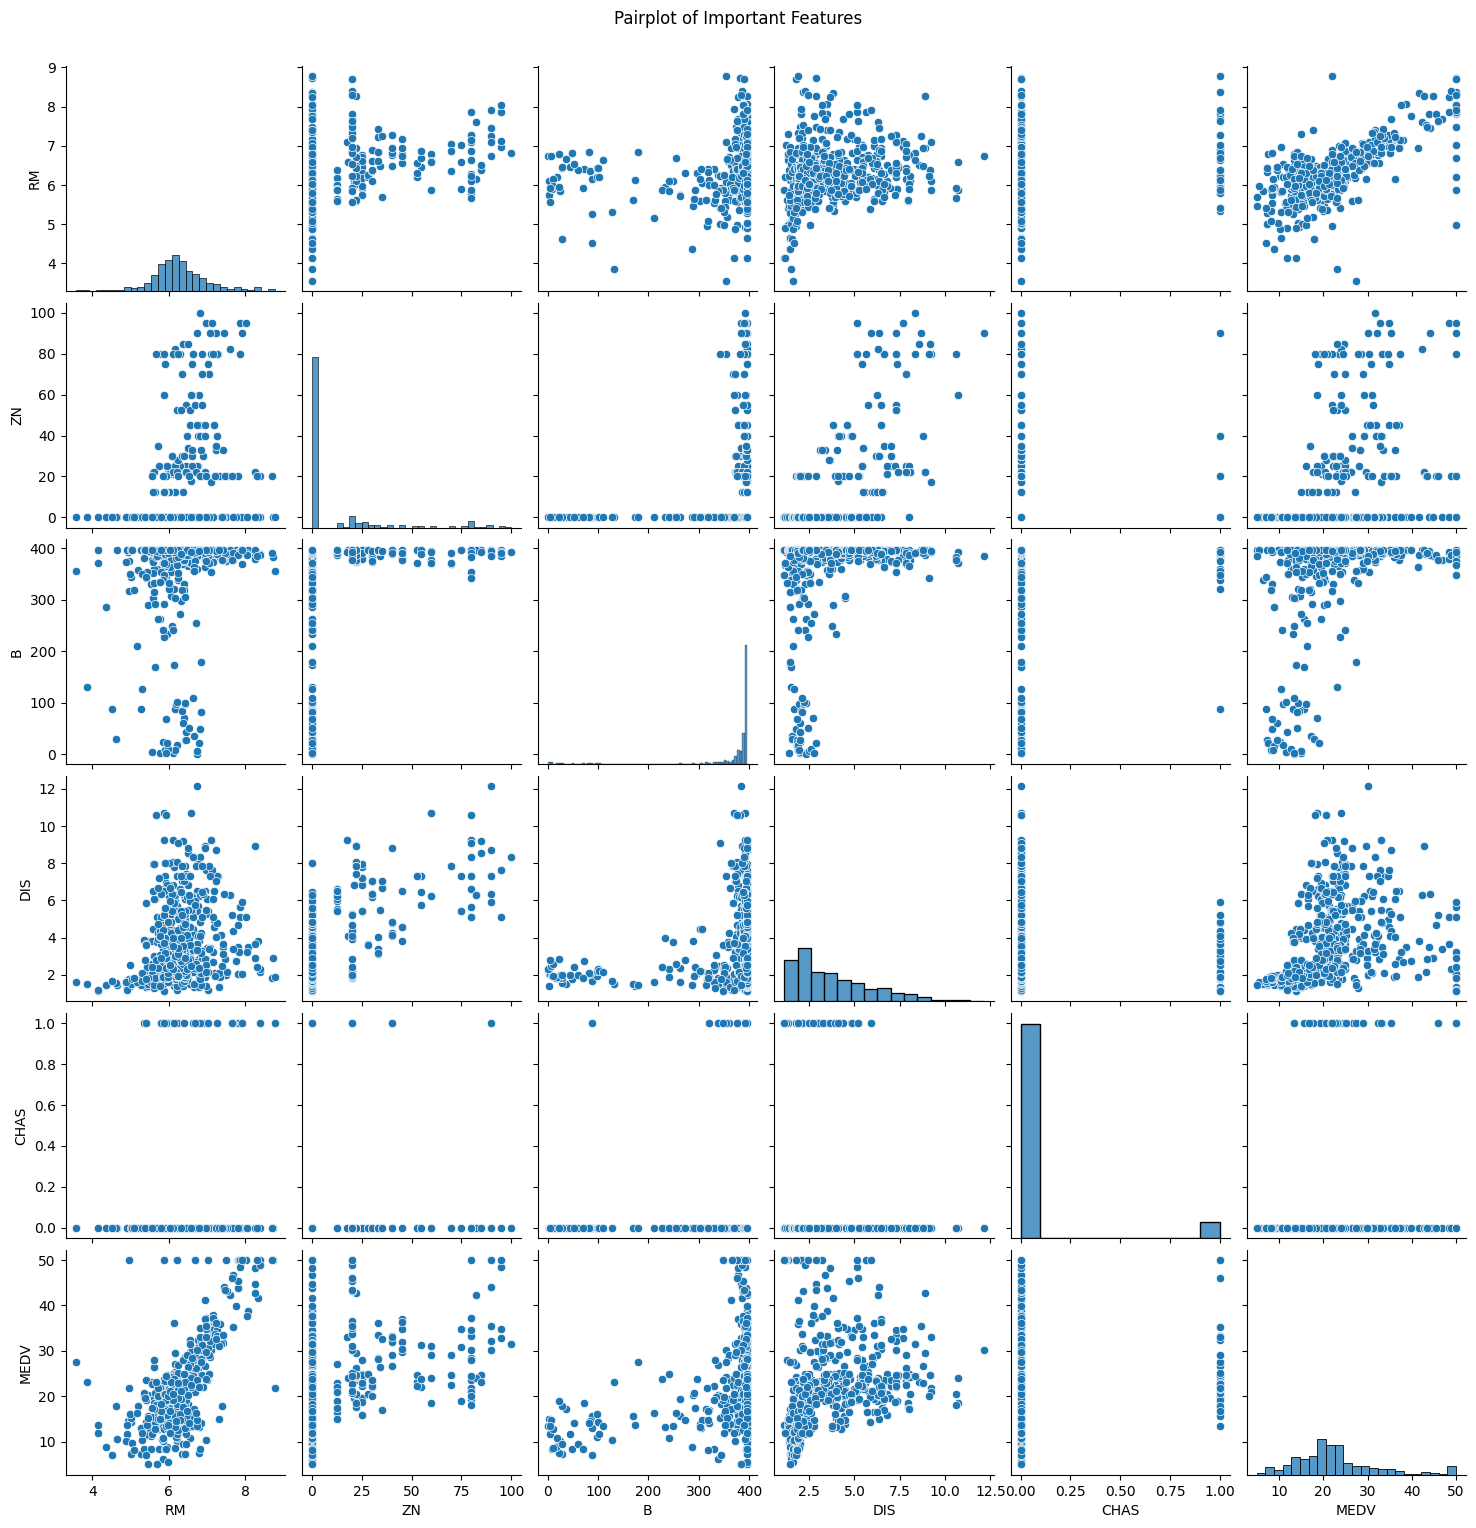

In [18]:
# Pairplot of important features
important_features = list(top_corr_features) + ['MEDV']
plt.figure(figsize=(15, 10))
sns.pairplot(df[important_features], height=2.5)
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

### 4. Identifying Missing Values and Outliers

Missing values per column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


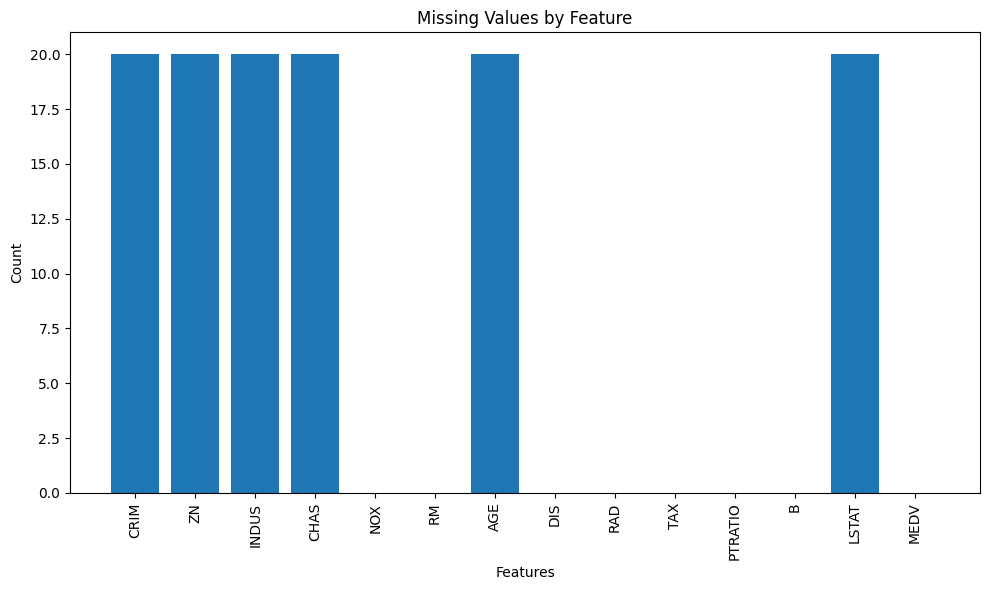

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(missing_values.index, missing_values)
    plt.title('Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

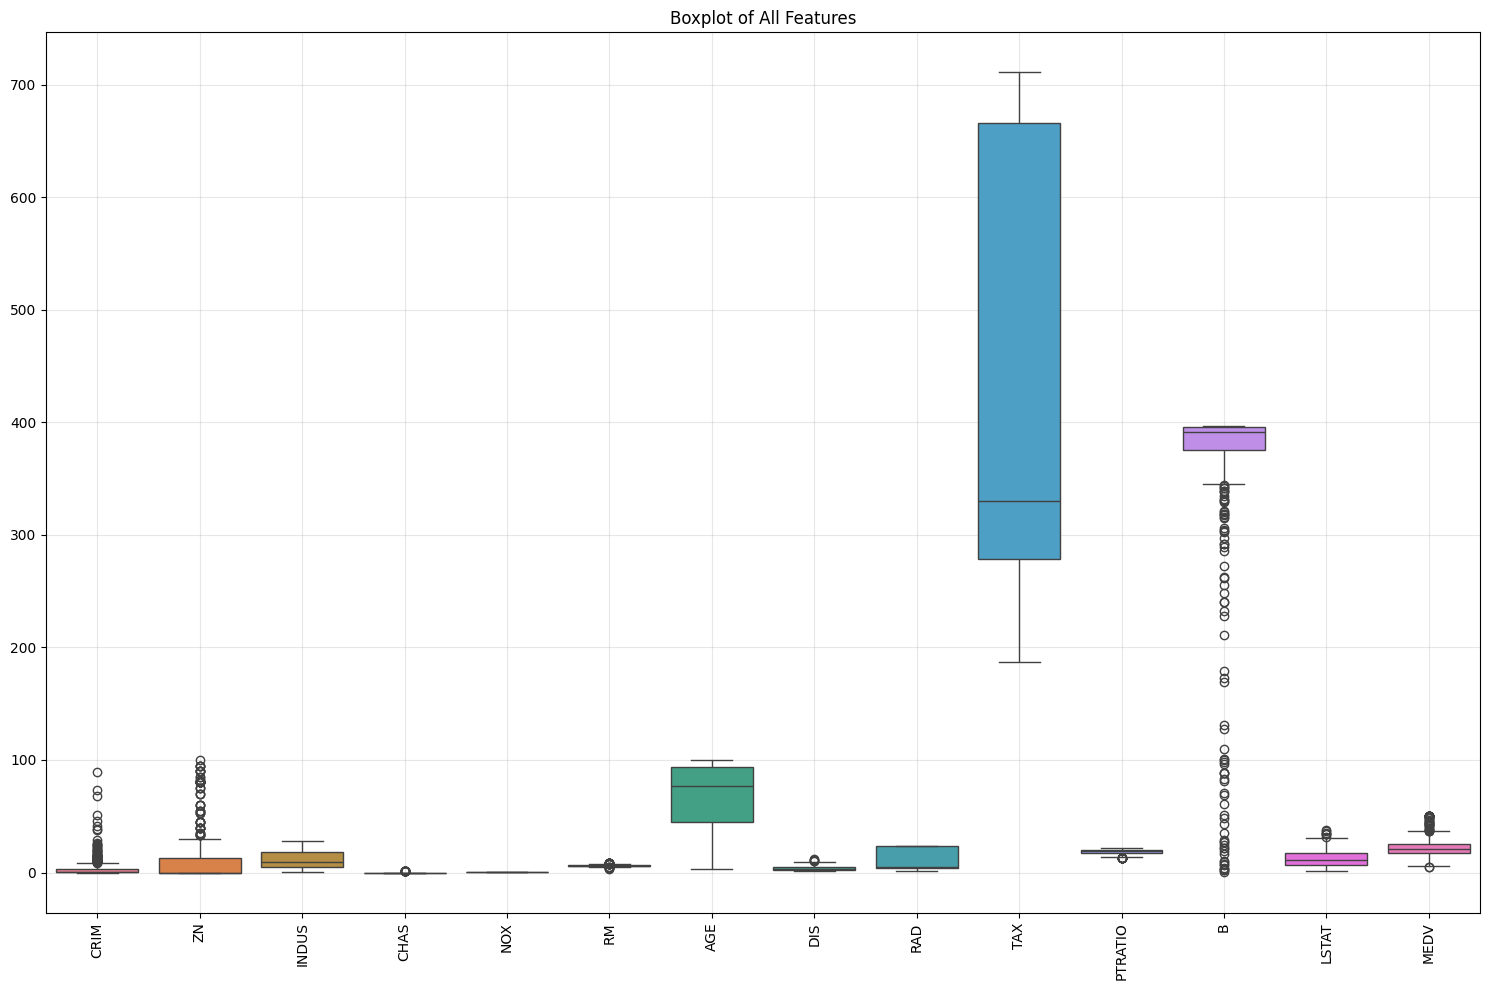

In [20]:
# Detect outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of All Features')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

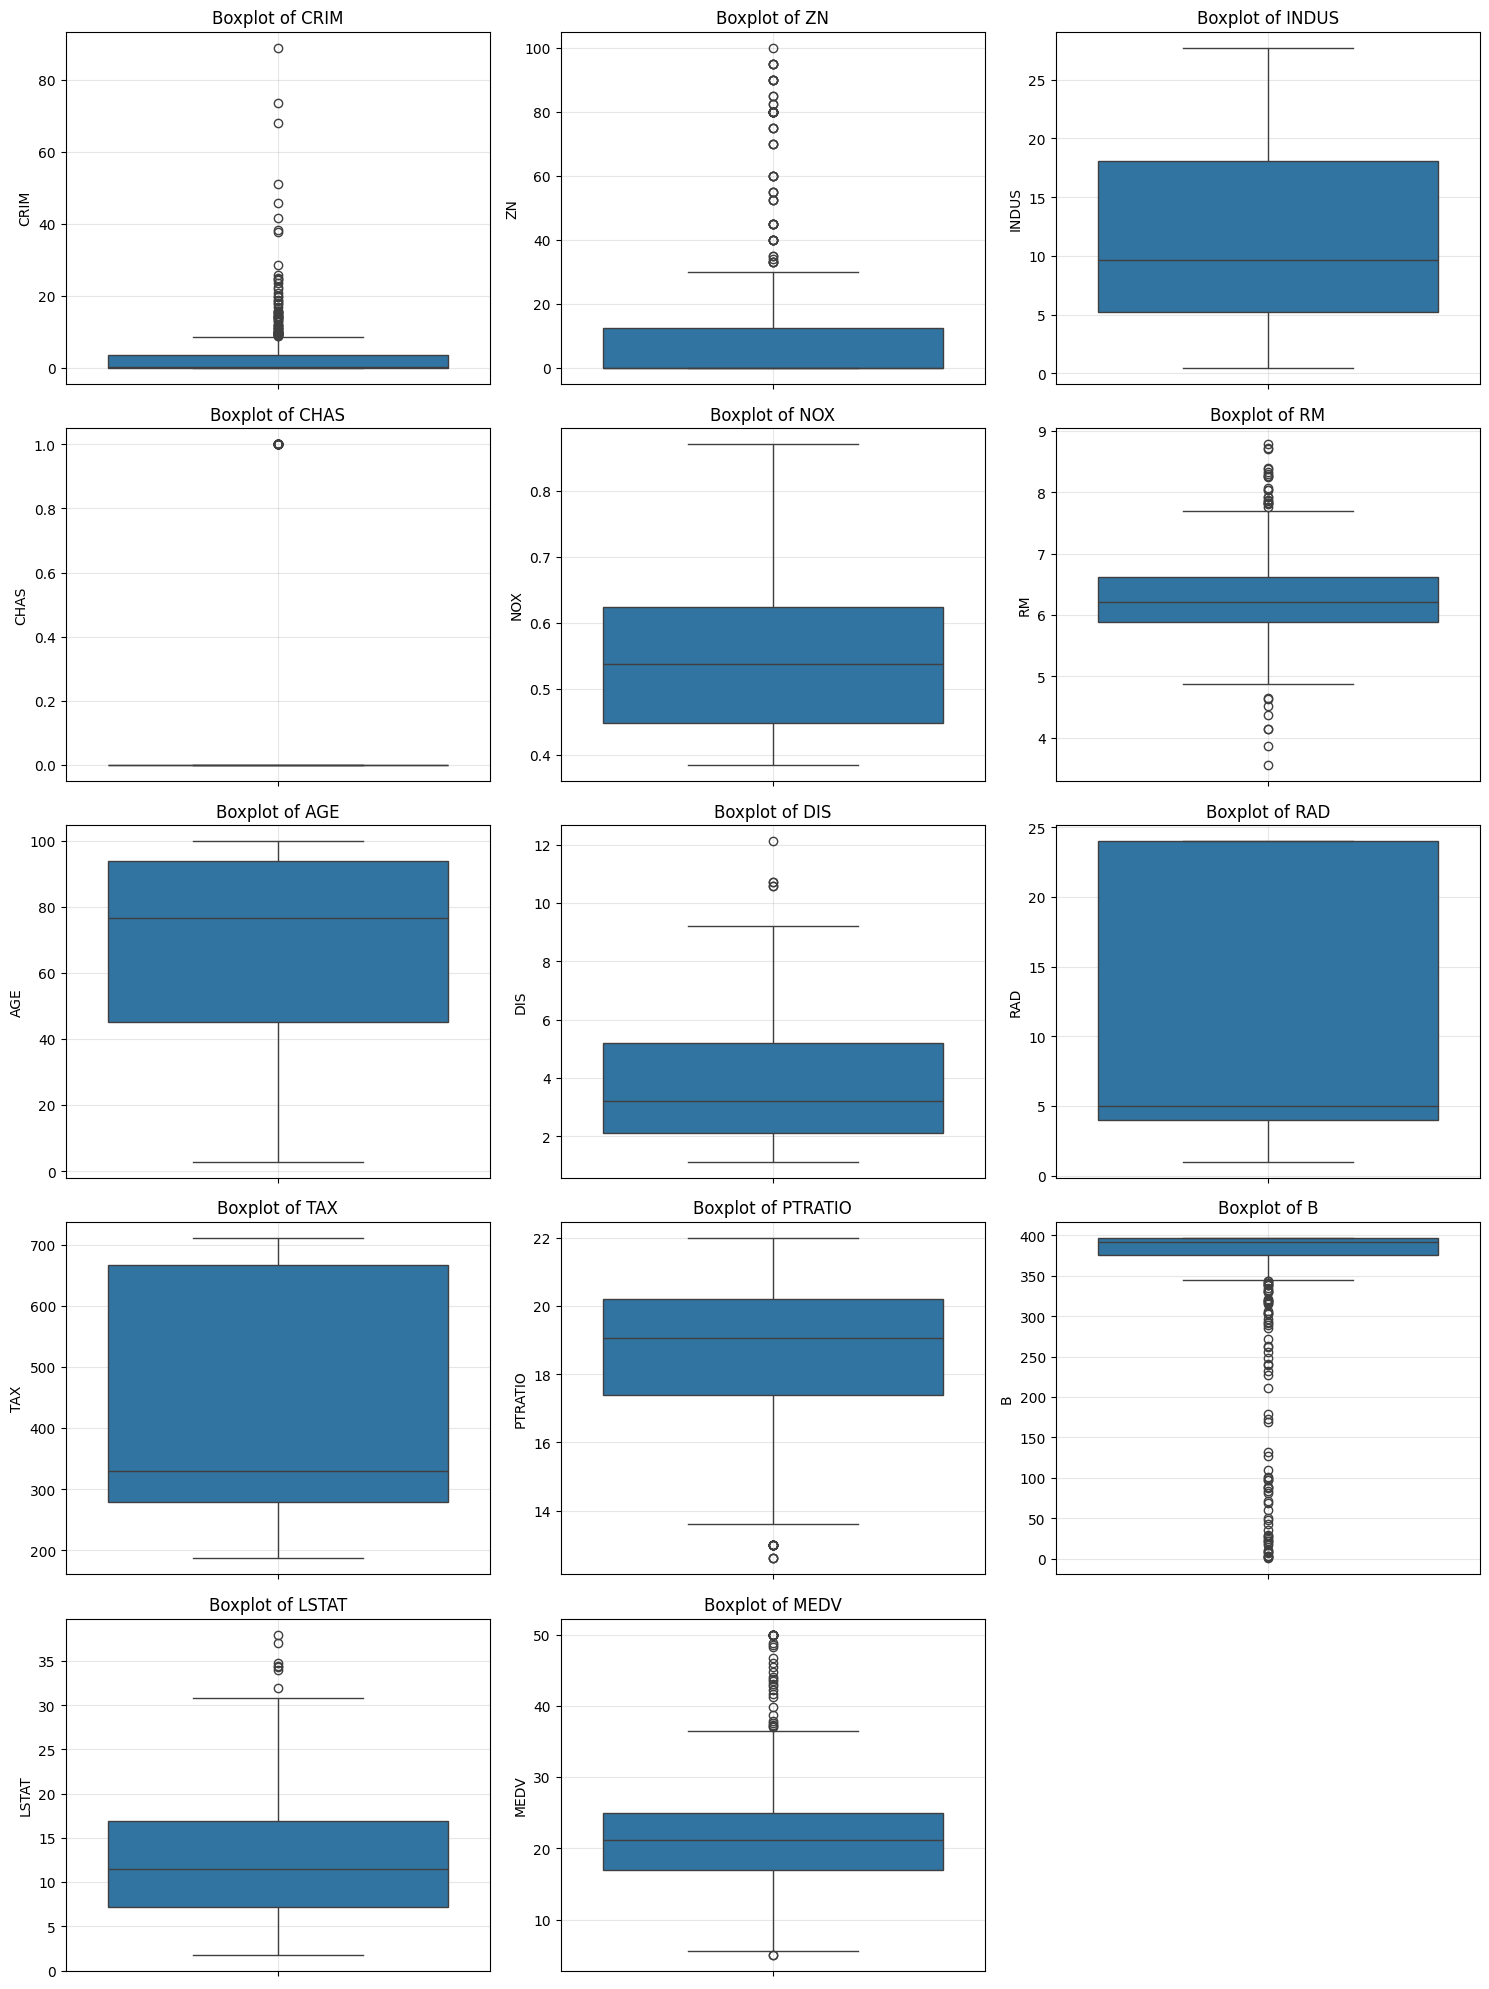

In [21]:
# Boxplots for individual features
num_features = len(df.columns)
num_rows = (num_features + 2) // 3  # Calculate number of rows needed, rounded up

plt.figure(figsize=(15, num_rows * 4))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

In [22]:
# Detect outliers using IQR method and print summary
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

print("\nOutlier Detection Summary:")
for feature in df.columns:
    outliers = detect_outliers_iqr(df, feature)
    if len(outliers) > 0:
        print(f"{feature}: {len(outliers)} outliers detected")


Outlier Detection Summary:
CRIM: 65 outliers detected
ZN: 63 outliers detected
CHAS: 34 outliers detected
RM: 30 outliers detected
DIS: 5 outliers detected
PTRATIO: 15 outliers detected
B: 77 outliers detected
LSTAT: 7 outliers detected
MEDV: 40 outliers detected


### 5. Feature Distributions

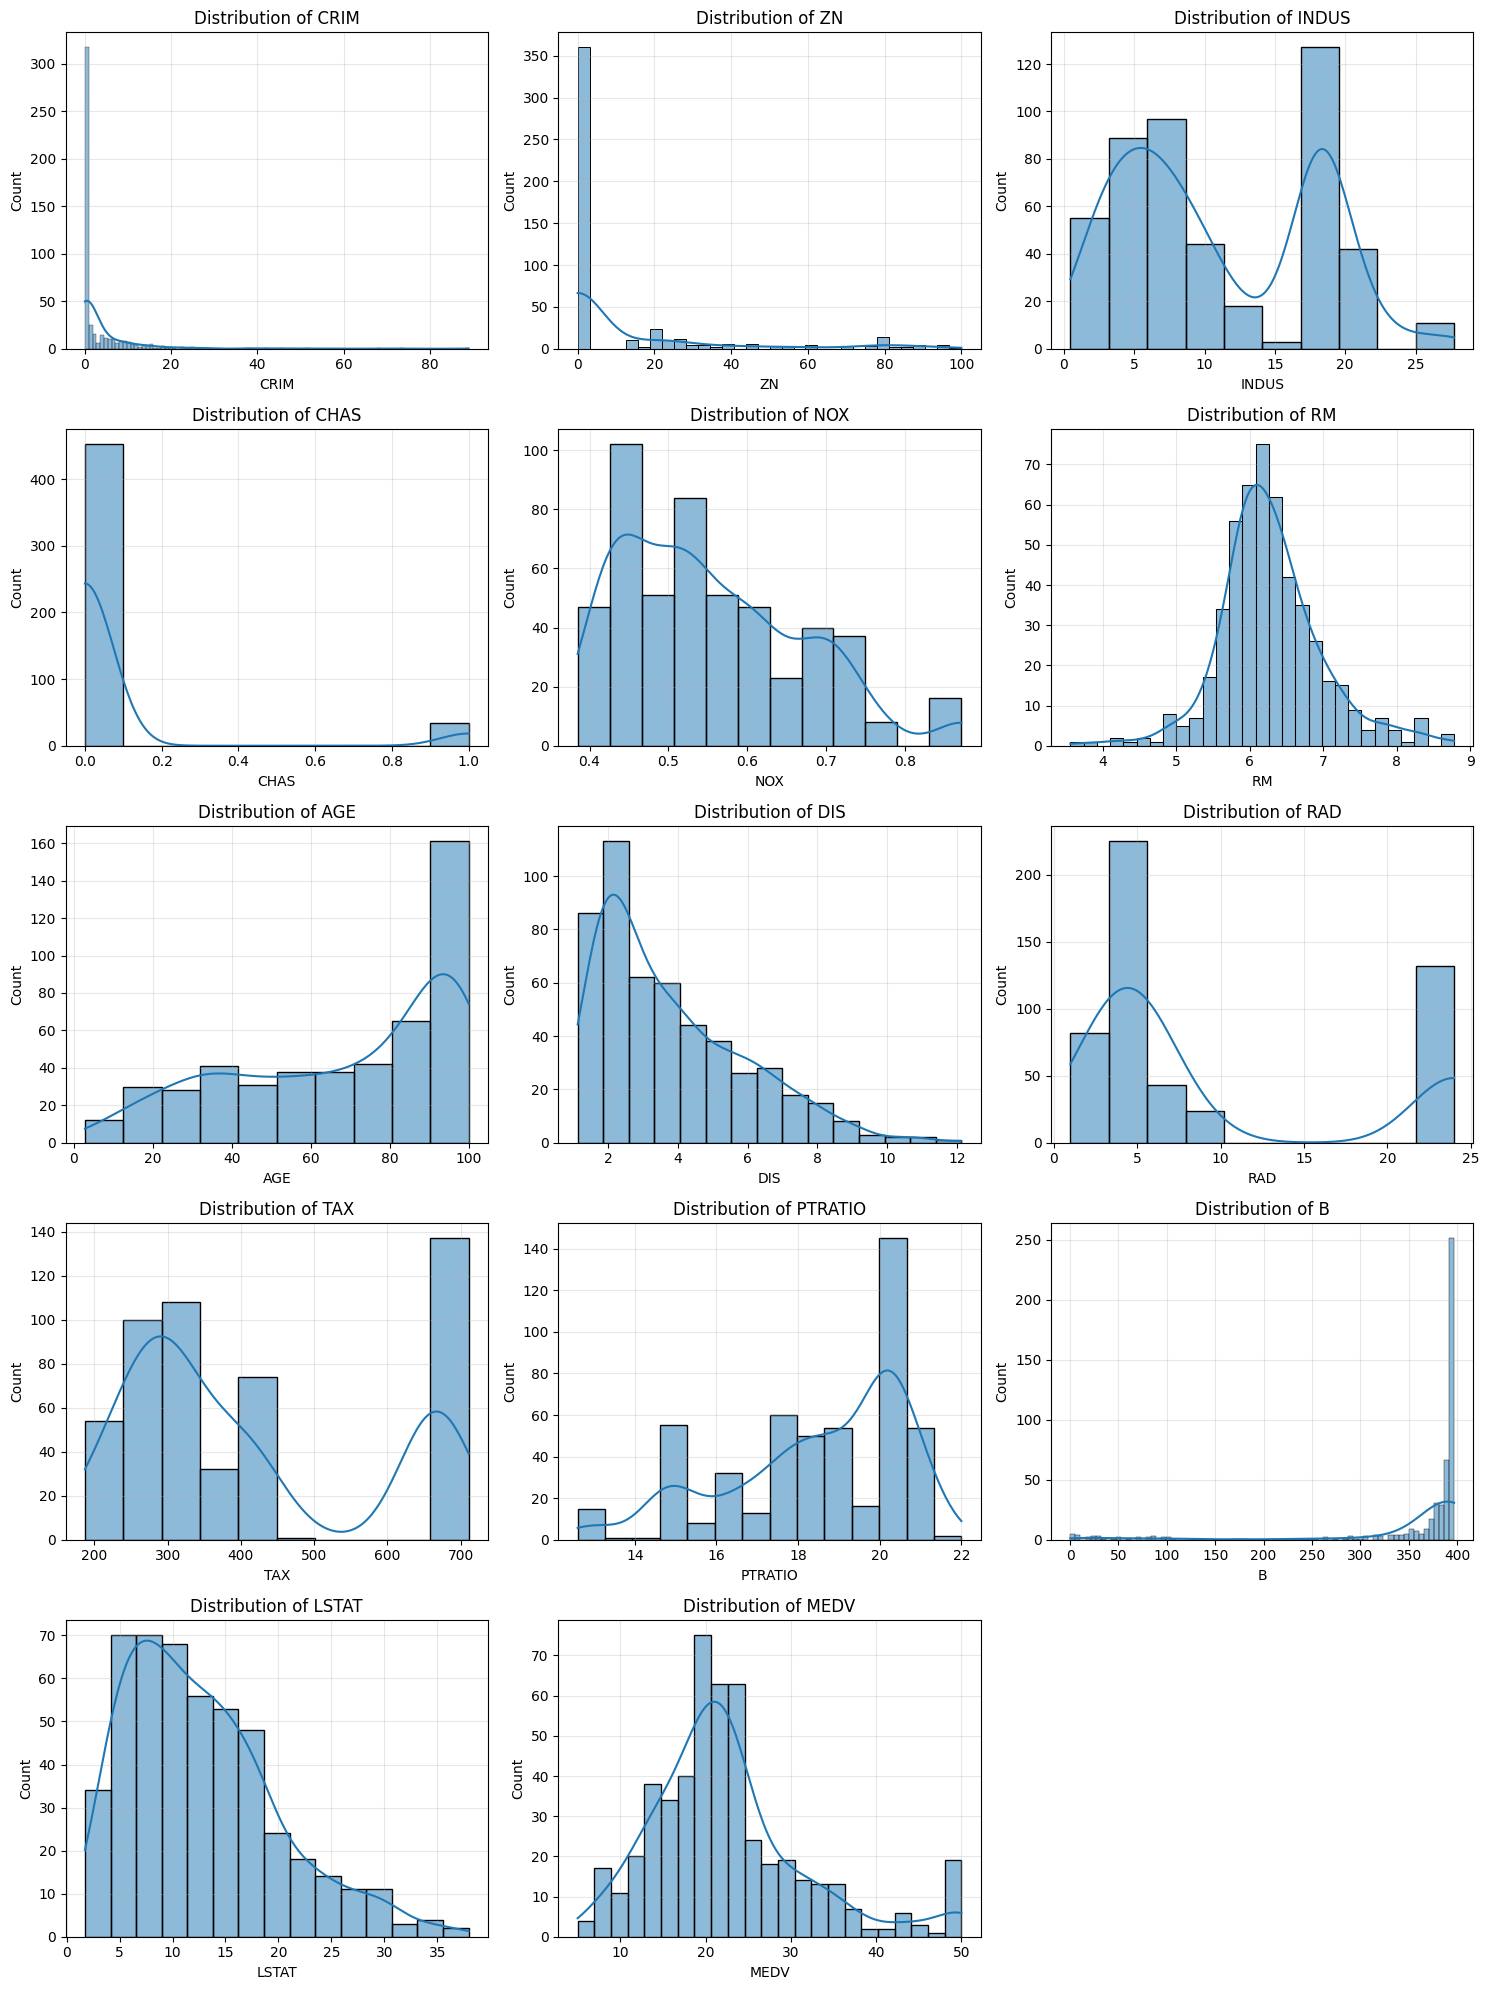

In [23]:
# Visualize the distribution of each feature
num_features = len(df.columns)
num_rows = (num_features + 2) // 3

plt.figure(figsize=(15, num_rows * 4))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

### 6. Analysis of Categorical-Like Features

In [30]:
# Number of unique values in each column
print(df.nunique().sort_values())

CHAS         2
RAD          9
ZN          26
PTRATIO     46
TAX         66
INDUS       76
NOX         81
MEDV       229
AGE        348
B          357
DIS        412
LSTAT      438
RM         446
CRIM       484
dtype: int64


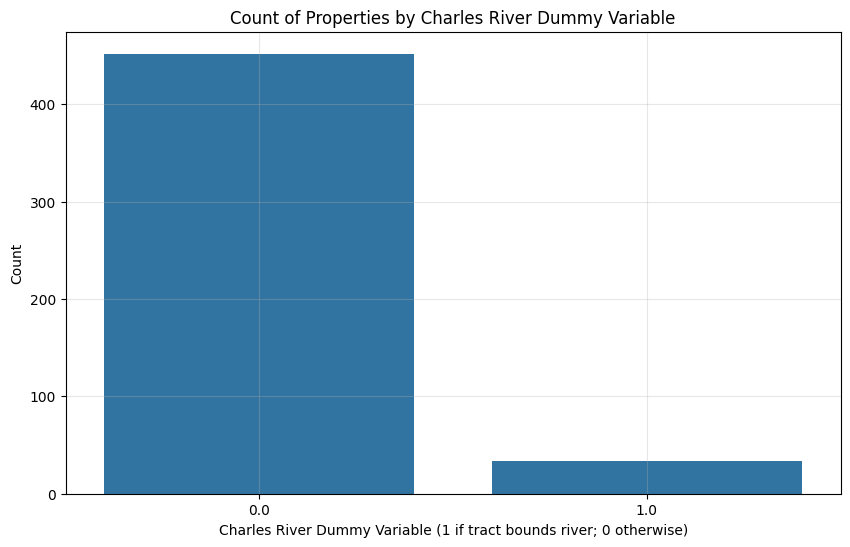

In [28]:
# Examine CHAS, which is a binary feature (0 or 1),
# This behave like categorical variables, even though this is represented as numbers.
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Count of Properties by Charles River Dummy Variable')
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

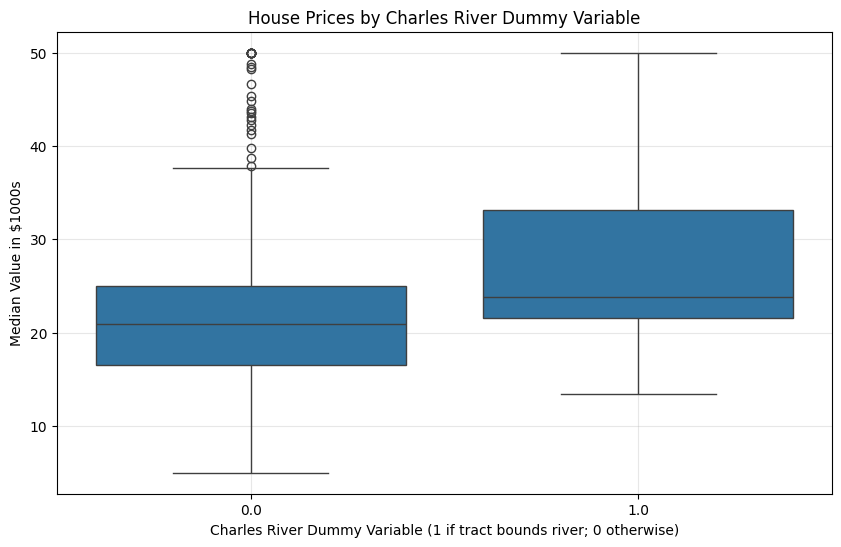

In [33]:
# Compare house prices based on CHAS, (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('House Prices by Charles River Dummy Variable')
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median Value in $1000s')
plt.grid(True, alpha=0.3)
plt.show()